<a href="https://colab.research.google.com/github/shreya139/MiningMavericks/blob/main/Weather_T28_Mining_Mavericks_CP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 02 - Data Mining


Dataset - New York State Hospital Inpatient Discharge

[Dataset Link](https://www.kaggle.com/datasets/thedevastator/2010-new-york-state-hospital-inpatient-discharge/)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## Data Understanding and Cleaning

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')

In [ ]:
data.shape

(2622133, 38)

In [ ]:
data.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2010,135.0,INTESTINAL INFECTION,0.0,NO PROC,249,"NON-BACTERIAL GASTROENTERITIS, NAUSEA & VOMITING",6,Diseases and Disorders of the Digestive System,1,Minor,Minor,Medical,Blue Cross,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,Not Span/Hispanic,15,Emergency,Home w/ Home Health Services,2010,231.0,OTHER FRACTURE,61.0,OT OR PRCS VES NOT HEAD,912,MUSCULOSKELETAL & OTHER PROCEDURES FOR MULTIPL...,25,Multiple Significant Trauma,3,Major,Extreme,Surgical,Insurance Company,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,Not Span/Hispanic,3,Emergency,Home w/ Home Health Services,2010,42.0,SECONDARY MALIGNANCY,0.0,NO PROC,240,DIGESTIVE MALIGNANCY,6,Diseases and Disorders of the Digestive System,3,Major,Major,Medical,Medicare,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,5,Elective,Home w/ Home Health Services,2010,254.0,REHAB/PROSTH FIT/ADJUST,215.0,OT PHYS THER/REHAB,860,REHABILITATION,23,"Rehabilitation, Aftercare, Other Factors Influ...",2,Moderate,Minor,Medical,Medicare,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,4,Elective,Inpatient Rehabilitation Facility,2010,203.0,OSTEOARTHRITIS,153.0,"HIP REPLACEMENT,TOT/PRT",301,HIP JOINT REPLACEMENT,8,Diseases and Disorders of the Musculoskeletal ...,1,Minor,Minor,Surgical,Medicare,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

In [ ]:
missing_values = data.isnull().sum()
total_rows = data.shape[0]
percentage_missing = (missing_values / total_rows) * 100
percentage_missing

index                                   0.000000
Health Service Area                     0.186375
Hospital County                         0.186375
Operating Certificate Number            0.186375
Facility ID                             0.186375
Facility Name                           0.000000
Age Group                               0.000000
Zip Code - 3 digits                     0.122076
Gender                                  0.000000
Race                                    0.000000
Ethnicity                               0.000000
Length of Stay                          0.000000
Type of Admission                       0.000000
Patient Disposition                     0.003928
Discharge Year                          0.000000
CCS Diagnosis Code                      0.086685
CCS Diagnosis Description               0.086685
CCS Procedure Code                      0.086685
CCS Procedure Description               0.086685
APR DRG Code                            0.000000
APR DRG Description 

In [ ]:
columns_to_drop = ['index','Other Provider License Number','Abortion Edit Indicator','Discharge Year','Operating Provider License Number']
data = data.drop(columns=columns_to_drop)

In [ ]:
null_counts_per_row = data.isnull().sum(axis=1)
max_null_values = 6
data = data[null_counts_per_row < max_null_values]

In [ ]:
missing_values = data.isnull().sum()
total_rows = data.shape[0]
percentage_missing = (missing_values / total_rows) * 100
percentage_missing

Health Service Area                     0.021856
Hospital County                         0.021856
Operating Certificate Number            0.021856
Facility ID                             0.021856
Facility Name                           0.000000
Age Group                               0.000000
Zip Code - 3 digits                     0.122273
Gender                                  0.000000
Race                                    0.000000
Ethnicity                               0.000000
Length of Stay                          0.000000
Type of Admission                       0.000000
Patient Disposition                     0.003936
CCS Diagnosis Code                      0.058691
CCS Diagnosis Description               0.058691
CCS Procedure Code                      0.058691
CCS Procedure Description               0.058691
APR DRG Code                            0.000000
APR DRG Description                     0.000000
APR MDC Code                            0.000000
APR MDC Description 

In [ ]:
data.isnull().sum()

Health Service Area                        572
Hospital County                            572
Operating Certificate Number               572
Facility ID                                572
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3200
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
CCS Diagnosis Code                        1536
CCS Diagnosis Description                 1536
CCS Procedure Code                        1536
CCS Procedure Description                 1536
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Description                          0
APR Severity 

In [ ]:
null_rows_check_colunms = ['Patient Disposition','CCS Diagnosis Code','CCS Diagnosis Description','CCS Procedure Code','CCS Procedure Description','Zip Code - 3 digits'
                          ,'APR Severity of Illness Description','APR Risk of Mortality']
data = data.dropna(subset=null_rows_check_colunms)

In [ ]:
col = ['Source of Payment 2','Source of Payment 3']
data[col] = data[col].fillna("unused")

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

Health Service Area                    0
Hospital County                        0
Operating Certificate Number           0
Facility ID                            0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surg

In [ ]:
columns_to_check = data.columns
for col in columns_to_check:
  unique_values = data[col].unique()
  if len(unique_values) <= 10:
    print(f"Unique values in column '{col}': {unique_values}")
    for value in unique_values:
      count = (data[col] == value).sum()
      print(f"Count of '{value}': {count}")
    print('\n')

Unique values in column 'Health Service Area': ['Capital/Adiron' 'Western NY' 'Southern Tier' 'Central NY' 'Finger Lakes'
 'Hudson Valley' 'Long Island' 'New York City']
Count of 'Capital/Adiron': 177090
Count of 'Western NY': 184554
Count of 'Southern Tier': 31281
Count of 'Central NY': 170735
Count of 'Finger Lakes': 158467
Count of 'Hudson Valley': 272922
Count of 'Long Island': 385115
Count of 'New York City': 1231269


Unique values in column 'Age Group': ['0 to 17' '30 to 49' '50 to 69' '70 or Older' '18 to 29']
Count of '0 to 17': 386414
Count of '30 to 49': 543997
Count of '50 to 69': 679199
Count of '70 or Older': 722484
Count of '18 to 29': 279339


Unique values in column 'Gender': ['M' 'F' 'U']
Count of 'M': 1141017
Count of 'F': 1470353
Count of 'U': 63


Unique values in column 'Race': ['White' 'Black/African American' 'Other Race' 'Unknown']
Count of 'White': 1595220
Count of 'Black/African American': 496212
Count of 'Other Race': 491753
Count of 'Unknown': 28248


Uniqu

## Feature Selection

In [ ]:
data.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Source of Payment 1',
       'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

Some features have both Code and Description. So, we can discard the description for the model as we will not need to encode that features.

In [ ]:
model_data = data.copy()

In [ ]:
columns_to_drop = ['CCS Diagnosis Description','CCS Procedure Description','APR DRG Description','APR MDC Description','APR Severity of Illness Description']
model_data = model_data.drop(columns=columns_to_drop)

In [ ]:
model_data.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
5,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,M,White,Not Span/Hispanic,3,Emergency,Home or Self Care,234.0,0.0,930,25,2,Minor,Medical,Insurance Company,Self-Pay,unused,218155.0,0,N,8420.75,3246.34
6,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,M,White,Not Span/Hispanic,4,Emergency,Home w/ Home Health Services,234.0,108.0,930,25,2,Minor,Medical,Medicaid,Self-Pay,unused,207219.0,0,Y,21090.63,6194.34
7,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,242.0,0.0,812,21,2,Minor,Medical,Insurance Company,Self-Pay,unused,244921.0,0,Y,3571.75,1435.34
8,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,229.0,0.0,342,8,1,Minor,Medical,Insurance Company,Self-Pay,unused,242288.0,0,Y,7850.84,2278.30
9,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,143.0,86.0,227,6,1,Minor,Surgical,Other Federal Program,Self-Pay,unused,191936.0,0,N,13787.00,7491.89


In [ ]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611433 entries, 5 to 2617245
Data columns (total 28 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Health Service Area                object 
 1   Hospital County                    object 
 2   Operating Certificate Number       float64
 3   Facility ID                        float64
 4   Facility Name                      object 
 5   Age Group                          object 
 6   Zip Code - 3 digits                object 
 7   Gender                             object 
 8   Race                               object 
 9   Ethnicity                          object 
 10  Length of Stay                     object 
 11  Type of Admission                  object 
 12  Patient Disposition                object 
 13  CCS Diagnosis Code                 float64
 14  CCS Procedure Code                 float64
 15  APR DRG Code                       int64  
 16  APR MDC Code      

In [ ]:
object_columns = model_data.select_dtypes(include='object').columns
object_columns

Index(['Health Service Area', 'Hospital County', 'Facility Name', 'Age Group',
       'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Source of Payment 1',
       'Source of Payment 2', 'Source of Payment 3',
       'Emergency Department Indicator'],
      dtype='object')

In [ ]:
columns_to_label_encode = ['Health Service Area', 'Hospital County',
       'Facility Name','Age Group', 'Gender', 'Race', 'Ethnicity',
       'Type of Admission', 'Patient Disposition','APR Risk of Mortality',
       'APR Medical Surgical Description', 'Source of Payment 1',
       'Source of Payment 2', 'Source of Payment 3','Emergency Department Indicator']
df_encoded = model_data.copy()
for column in columns_to_label_encode:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])

In [ ]:
df_encoded['Zip Code - 3 digits'] = pd.to_numeric(df_encoded['Zip Code - 3 digits'], errors='coerce', downcast='integer')
df_encoded['Length of Stay'] = pd.to_numeric(df_encoded['Length of Stay'], errors='coerce', downcast='integer')

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611433 entries, 5 to 2617245
Data columns (total 28 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Health Service Area                int32  
 1   Hospital County                    int32  
 2   Operating Certificate Number       float64
 3   Facility ID                        float64
 4   Facility Name                      int32  
 5   Age Group                          int32  
 6   Zip Code - 3 digits                float64
 7   Gender                             int32  
 8   Race                               int32  
 9   Ethnicity                          int32  
 10  Length of Stay                     float64
 11  Type of Admission                  int32  
 12  Patient Disposition                int32  
 13  CCS Diagnosis Code                 float64
 14  CCS Procedure Code                 float64
 15  APR DRG Code                       int64  
 16  APR MDC Code      

In [ ]:
df_encoded=df_encoded.fillna(0)

In [ ]:
df_encoded.isnull().sum()

Health Service Area                  0
Hospital County                      0
Operating Certificate Number         0
Facility ID                          0
Facility Name                        0
Age Group                            0
Zip Code - 3 digits                  0
Gender                               0
Race                                 0
Ethnicity                            0
Length of Stay                       0
Type of Admission                    0
Patient Disposition                  0
CCS Diagnosis Code                   0
CCS Procedure Code                   0
APR DRG Code                         0
APR MDC Code                         0
APR Severity of Illness Code         0
APR Risk of Mortality                0
APR Medical Surgical Description     0
Source of Payment 1                  0
Source of Payment 2                  0
Source of Payment 3                  0
Attending Provider License Number    0
Birth Weight                         0
Emergency Department Indi

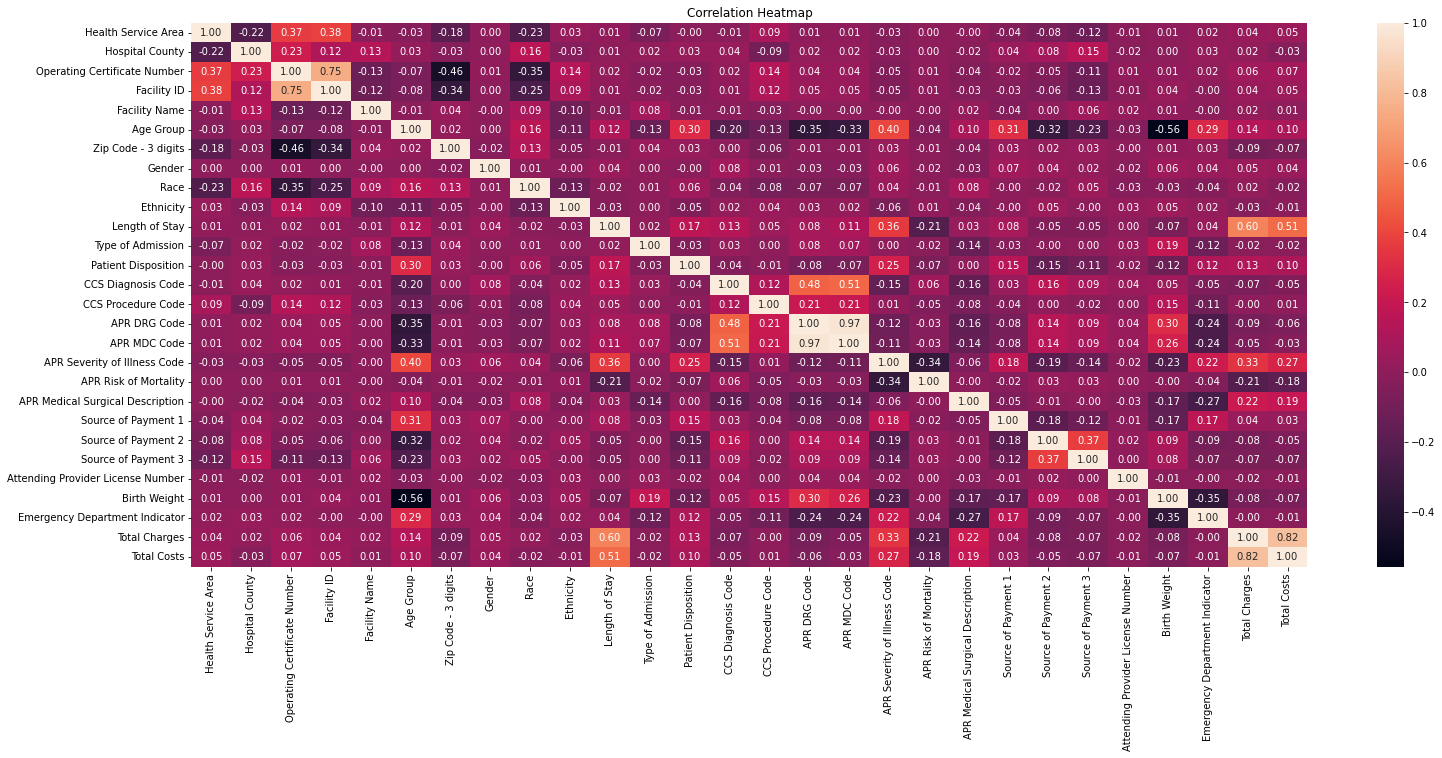

In [ ]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## EDA

In [ ]:
def plot_categorical_with_percentage(data, col):
    plt.figure(figsize=(15, 6))
    unique_categories = data[col].nunique()
    if unique_categories > 8:
        top_categories = data[col].value_counts().index[:8]
        filtered_data = data[data[col].isin(top_categories)]
    else:
        filtered_data = data

    ax = sns.barplot(x=filtered_data[col].value_counts().index, y=filtered_data[col].value_counts(normalize=True) * 100,palette='Paired')
    ax.set_ylabel('Percentage')
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')
    plt.title(col)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.show()

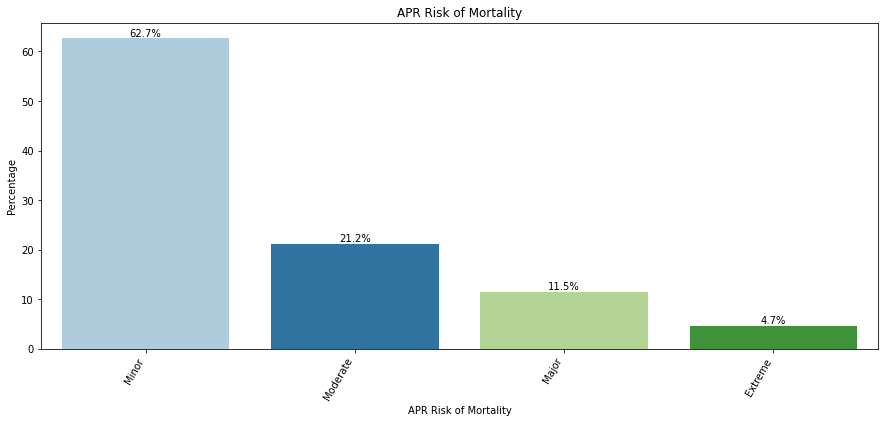

In [ ]:
plot_categorical_with_percentage(data, 'APR Risk of Mortality')

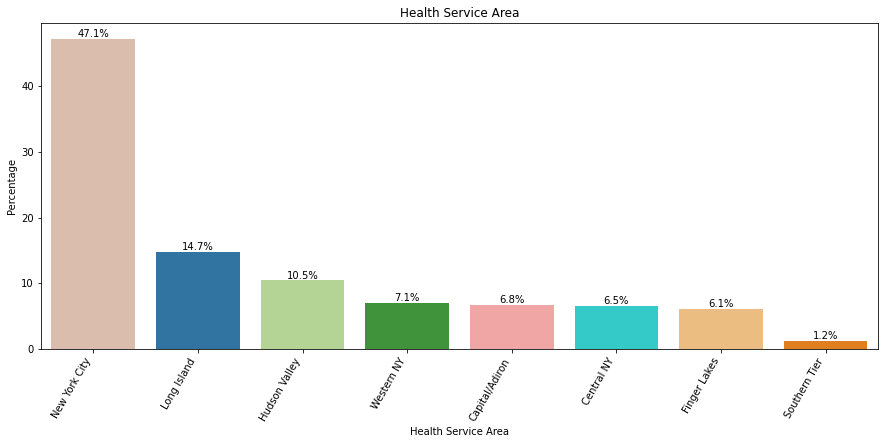

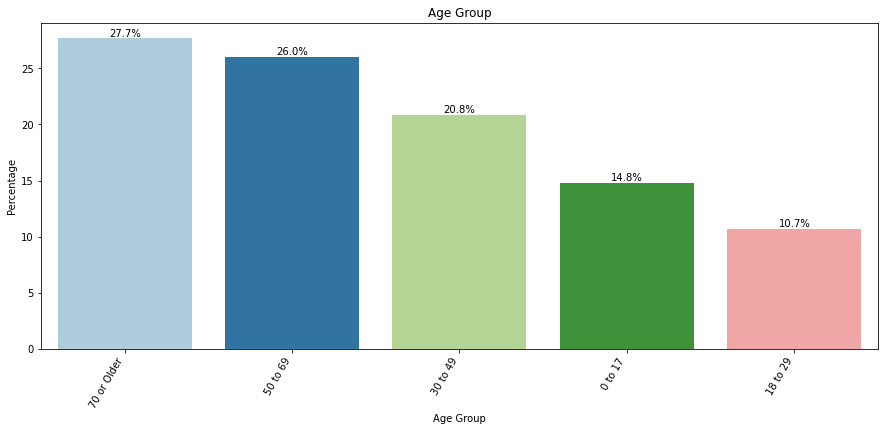

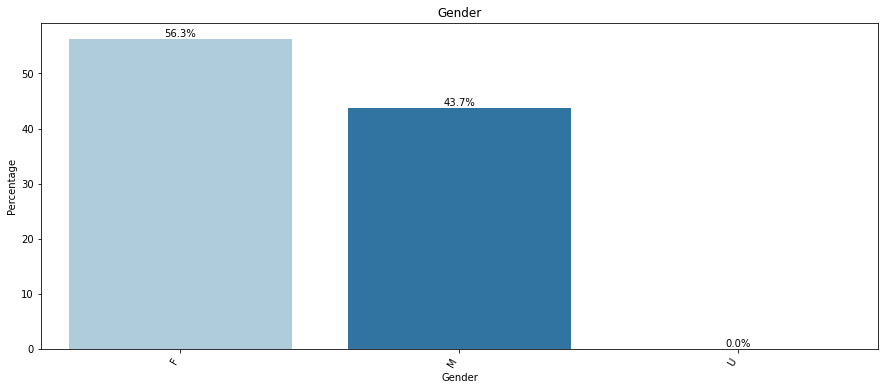

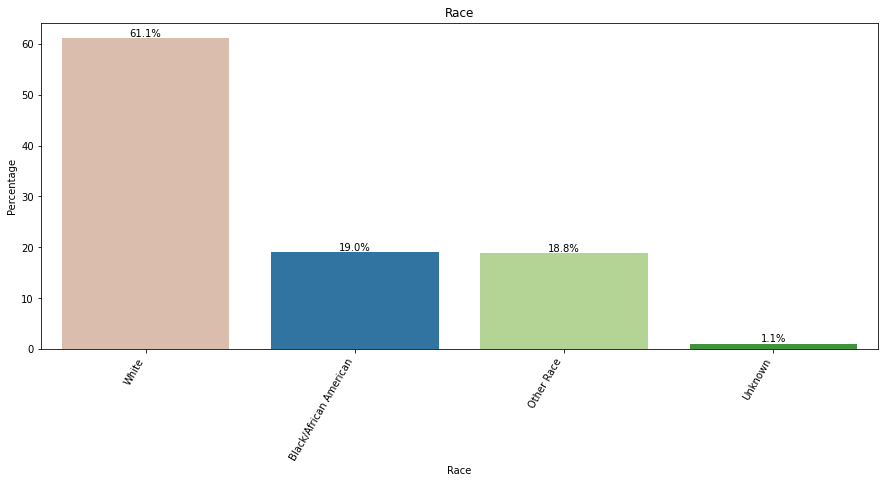

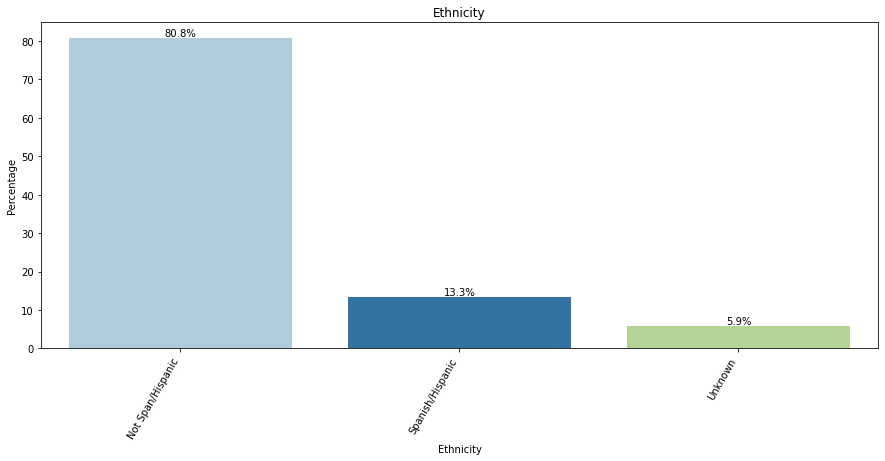

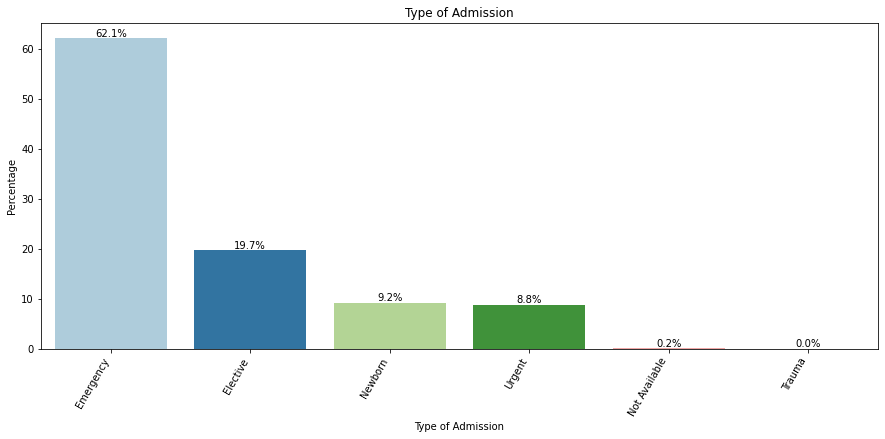

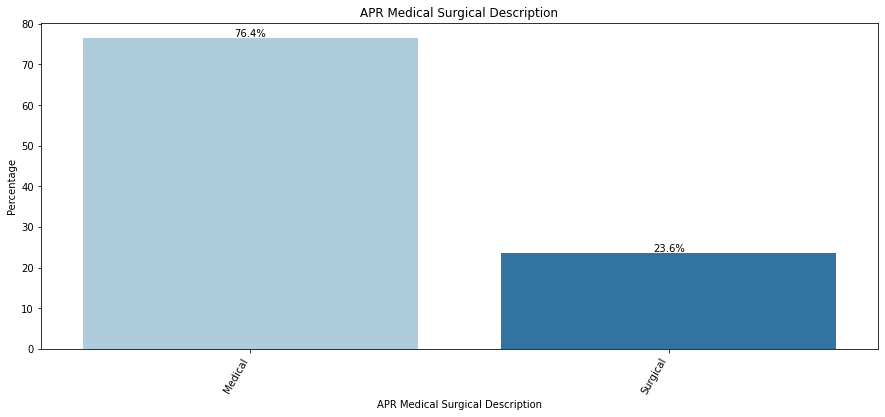

In [ ]:
categorical_columns = ["Health Service Area", "Age Group", "Gender", "Race", "Ethnicity", "Type of Admission", "APR Medical Surgical Description"]
for column in categorical_columns:
    plot_categorical_with_percentage(data, column)

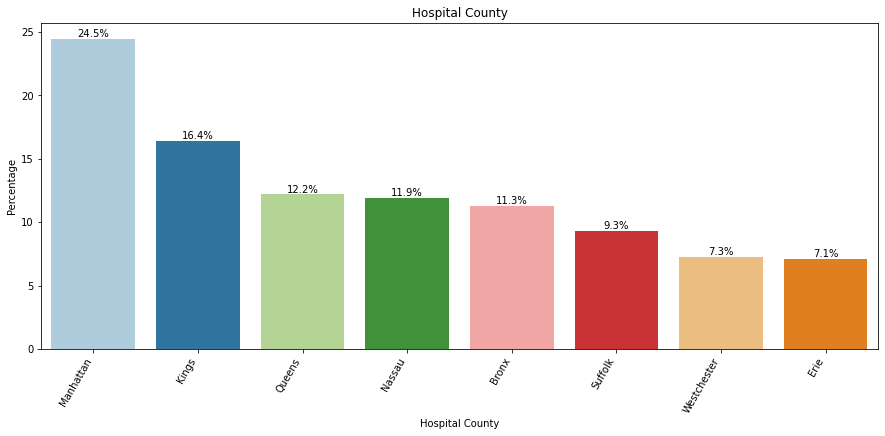

In [ ]:
plot_categorical_with_percentage(data, 'Hospital County')

## Models

### Prediction of Risk of Mortality

In [ ]:
correlation_matrix['APR Risk of Mortality']

Health Service Area                  0.001424
Hospital County                      0.000562
Operating Certificate Number         0.006289
Facility ID                          0.005333
Age Group                           -0.037146
Gender                              -0.015421
Race                                -0.008459
Ethnicity                            0.010444
Type of Admission                   -0.016605
Patient Disposition                 -0.066518
CCS Diagnosis Code                   0.058951
CCS Procedure Code                  -0.054755
APR DRG Code                        -0.026850
APR MDC Code                        -0.032829
APR Severity of Illness Code        -0.337989
APR Risk of Mortality                1.000000
APR Medical Surgical Description    -0.002185
Source of Payment 1                 -0.023270
Source of Payment 2                  0.029283
Source of Payment 3                  0.025567
Attending Provider License Number    0.003031
Birth Weight                      

In [ ]:
X = df_encoded[['CCS Procedure Code','CCS Diagnosis Code','Patient Disposition','APR Severity of Illness Code','Total Charges','Total Costs']]
Y = df_encoded['APR Risk of Mortality']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(name, predictions):
    accuracy = accuracy_score(Y_test, predictions)
#     precision = precision_score(Y_test, predictions, average='macro')  # Use 'micro', 'macro', 'weighted', or None
#     recall = recall_score(Y_test, predictions, average='macro')  # Use 'micro', 'macro', 'weighted', or None
#     f1 = f1_score(Y_test, predictions, average='macro')
    class_report = classification_report(Y_test, predictions)
    print(f"{name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
#     print(f"Precision: {precision:.2f}")
#     print(f"Recall: {recall:.2f}")
#     print(f"F1 Score: {f1:.2f}")
    print('Classification Report :')
    print(class_report)
    print()

#### Logistic Regression

In [ ]:
logistic_regression_model = LogisticRegression(penalty='l2',max_iter=500,C=0.6)
logistic_regression_model.fit(X_train, Y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test)
evaluate_model("Logistic Regression", logistic_regression_predictions)

C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Evaluation:
Accuracy: 0.64
Precision: 0.41
Recall: 0.34
F1 Score: 0.33



#### Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(criterion="gini",max_depth=15)
decision_tree.fit(X_train, Y_train)
decision_tree_predictions = decision_tree.predict(X_test)
evaluate_model("Decision Tree", decision_tree_predictions)

Decision Tree Evaluation:
Accuracy: 0.72
Classification Report :
              precision    recall  f1-score   support

           0       0.61      0.62      0.61     24247
           1       0.44      0.44      0.44     59720
           2       0.87      0.87      0.87    327431
           3       0.46      0.46      0.46    110889

    accuracy                           0.72    522287
   macro avg       0.60      0.60      0.60    522287
weighted avg       0.72      0.72      0.72    522287




Trying different Max Depth for better accurary

In [ ]:
for i in range(5,25,2):
    print("Max Depth :",i)
    decision_tree = DecisionTreeClassifier(criterion="gini",max_depth=i)
    decision_tree.fit(X_train, Y_train)
    decision_tree_predictions = decision_tree.predict(X_test)
    evaluate_model("Decision Tree", decision_tree_predictions)

Max Depth : 5
Decision Tree Evaluation:
Accuracy: 0.75
Classification Report :
              precision    recall  f1-score   support

           0       0.74      0.63      0.68     24247
           1       0.52      0.45      0.48     59720
           2       0.85      0.93      0.89    327431
           3       0.49      0.40      0.44    110889

    accuracy                           0.75    522287
   macro avg       0.65      0.60      0.62    522287
weighted avg       0.73      0.75      0.74    522287


Max Depth : 7
Decision Tree Evaluation:
Accuracy: 0.76
Classification Report :
              precision    recall  f1-score   support

           0       0.70      0.73      0.72     24247
           1       0.53      0.42      0.47     59720
           2       0.85      0.94      0.89    327431
           3       0.53      0.43      0.47    110889

    accuracy                           0.76    522287
   macro avg       0.65      0.63      0.64    522287
weighted avg       0.74   

#### Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=30, max_depth=15)
random_forest.fit(X_train, Y_train)
random_forest_predictions = random_forest.predict(X_test)
evaluate_model("Random Forest", random_forest_predictions)

Random Forest Evaluation:
Accuracy: 0.78
Classification Report :
              precision    recall  f1-score   support

           0       0.74      0.73      0.73     24247
           1       0.56      0.49      0.52     59720
           2       0.87      0.94      0.90    327431
           3       0.57      0.48      0.52    110889

    accuracy                           0.78    522287
   macro avg       0.68      0.66      0.67    522287
weighted avg       0.77      0.78      0.77    522287




#### Naive Bayes

In [ ]:
naive_bayes = MultinomialNB(alpha = 1)
naive_bayes.fit(X_train, Y_train)
naive_bayes_predictions = naive_bayes.predict(X_test)
evaluate_model("Naive Bayes", naive_bayes_predictions)

Naive Bayes Evaluation:
Accuracy: 0.55
Classification Report :
              precision    recall  f1-score   support

           0       0.21      0.36      0.26     24247
           1       0.22      0.26      0.24     59720
           2       0.76      0.71      0.73    327431
           3       0.29      0.27      0.28    110889

    accuracy                           0.55    522287
   macro avg       0.37      0.40      0.38    522287
weighted avg       0.57      0.55      0.56    522287




#### K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_test)
evaluate_model("K-Nearest Neighbors (KNN)", knn_predictions)

K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.60
Classification Report :
              precision    recall  f1-score   support

           0       0.28      0.23      0.25     24247
           1       0.23      0.21      0.22     59720
           2       0.72      0.85      0.78    327431
           3       0.32      0.18      0.23    110889

    accuracy                           0.60    522287
   macro avg       0.39      0.37      0.37    522287
weighted avg       0.56      0.60      0.57    522287




Trying different number of neighbors for better accuracy

In [ ]:
for i in range(20,50,5):
    print('Neighbors :',i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    knn_predictions = knn.predict(X_test)
    evaluate_model("K-Nearest Neighbors (KNN)", knn_predictions)

Neighbors : 20
K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.63
Classification Report :
              precision    recall  f1-score   support

           0       0.36      0.19      0.25     24247
           1       0.27      0.12      0.16     59720
           2       0.69      0.92      0.79    327431
           3       0.33      0.15      0.21    110889

    accuracy                           0.63    522287
   macro avg       0.41      0.34      0.35    522287
weighted avg       0.55      0.63      0.57    522287


Neighbors : 25
K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.63
Classification Report :
              precision    recall  f1-score   support

           0       0.37      0.19      0.25     24247
           1       0.28      0.11      0.15     59720
           2       0.69      0.92      0.79    327431
           3       0.33      0.14      0.20    110889

    accuracy                           0.63    522287
   macro avg       0.42      0.34      0.35    522287


#### One vs Rest

In [ ]:
binary_classifiers = {}

In [ ]:
for class_label in np.unique(Y_train):
    y_train_binary = (Y_train == class_label).astype(int)

    # Train a binary logistic regression classifier
    model = LogisticRegression()
    model.fit(X_train, y_train_binary)

    # Store the trained binary classifier
    binary_classifiers[class_label] = model


In [ ]:
y_pred = np.argmax(np.array([model.predict_proba(X_test)[:, 1] for model in binary_classifiers.values()]).T, axis=1)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')

class_report = classification_report(Y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.6550364071860874
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.19      0.28     24247
           1       0.35      0.09      0.15     59720
           2       0.74      0.90      0.81    327431
           3       0.37      0.34      0.35    110889

    accuracy                           0.66    522287
   macro avg       0.50      0.38      0.40    522287
weighted avg       0.61      0.66      0.61    522287



Text(0.5, 1.0, 'Confusion Matrix')

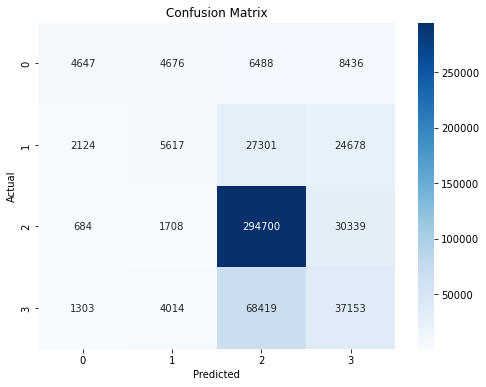

In [ ]:
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

### Prediction of Source of Payment 1

In [ ]:
x = df_encoded.drop(['Source of Payment 2','Source of Payment 3','Source of Payment 1'], axis=1)
y = df_encoded['Source of Payment 1']

In [ ]:
def Model_Validation(x, y, model):
    x_part,x_test,y_part,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
    x_train,x_val,y_train,y_val = train_test_split(x_part,y_part,test_size = 0.4,random_state = 42)

    model.fit(x_train,y_train)
    pred_train = model.predict(x_train)
    print('Statistics of Training Dataset:')
    print("Accuracy:", accuracy_score(y_train,pred_train))
    '''
    precision = precision_score(y_train, pred_train)
    print("Precision:", precision)
    recall = recall_score(y_train, pred_train)
    print("Recall:", recall)
    F1_score = f1_score(y_train, pred_train)
    print("F1-score:", F1_score)
    '''

    predictions = model.predict(x_val)
    print("\n\n\nStatistics of Validation Dataset:")
    print("Accuracy:", accuracy_score(y_val,predictions))
    '''
    precision2 = precision_score(y_val, predictions)
    print("Precision:", precision2)
    recall2 = recall_score(y_val, predictions)
    print("Recall:", recall2)
    F1_score2 = f1_score(y_val, predictions)
    print("F1-score:", F1_score2)
    '''
    CM = confusion_matrix(y_val, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model.classes_)
    disp.plot()
    plt.show()

#### Logistic Regression

Statistics of Training Dataset:
Accuracy: 0.38531392826571



Statistics of Validation Dataset:
Accuracy: 0.38519898666800695


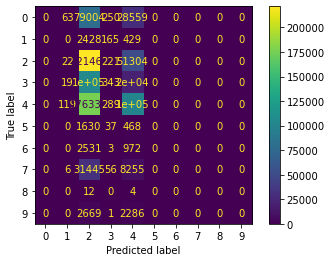

--- 522.3703212738037 seconds ---


In [ ]:
import time
start_time = time.time()

lr1 = LogisticRegression(max_iter=500,C=0.6)
Model_Validation(x, y, lr1)

print("--- %s seconds ---" % (time.time() - start_time))

#### Decision Tree

Statistics of Training Dataset:
Accuracy: 0.3817143695945823



Statistics of Validation Dataset:
Accuracy: 0.3815264360223488


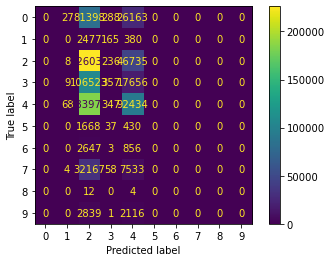

--- 444.72307229042053 seconds ---


In [ ]:
start_time = time.time()

dt1 = DecisionTreeClassifier(criterion="gini",max_depth=15)
Model_Validation(x, y, dt1)

print("--- %s seconds ---" % (time.time() - start_time))

#### Taking top 2 Values Only for Prediction

In [ ]:
df_encoded['Source of Payment 1'].value_counts()

4    865273
2    854816
3    388237
0    336352
7    124368
9     15494
6     10961
1      9420
5      6464
8        48
Name: Source of Payment 1, dtype: int64

In [ ]:
data2 = df_encoded[(df_encoded['Source of Payment 1'] == 4) | (df_encoded['Source of Payment 1'] == 2)]
data2['Source of Payment 1'].replace({2:0, 4:1}, inplace = True)

In [ ]:
x = data2.drop(['Source of Payment 2','Source of Payment 3','Source of Payment 1'], axis=1)
y = data2['Source of Payment 1']

Statistics of Training Dataset:
Accuracy: 0.645302685667638



Statistics of Validation Dataset:
Accuracy: 0.6434617362093931


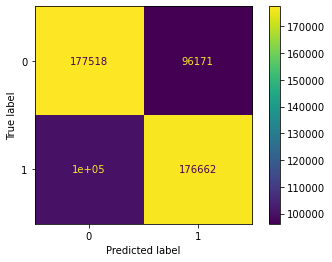

--- 11.28171706199646 seconds ---


In [ ]:
start_time = time.time()

lr1 = LogisticRegression(max_iter=500,C=0.6)
Model_Validation(x, y, lr1)

print("--- %s seconds ---" % (time.time() - start_time))

Statistics of Training Dataset:
Accuracy: 0.645302685667638



Statistics of Validation Dataset:
Accuracy: 0.6434617362093931


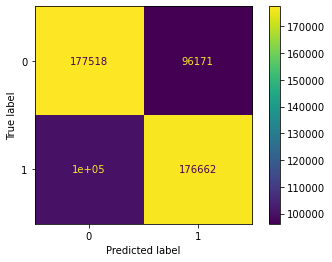

--- 9.992974758148193 seconds ---


In [ ]:
start_time = time.time()

dt1 = DecisionTreeClassifier(criterion="gini",max_depth=15)
Model_Validation(x, y, dt1)

print("--- %s seconds ---" % (time.time() - start_time))

### Prediction of APR Severity of Illness

In [ ]:
df = df_encoded[['Age Group', 'Length of Stay', 'Patient Disposition', 'APR Severity of Illness Code', 'APR Risk of Mortality', 'Emergency Department Indicator']]

In [ ]:
X = df.drop('APR Severity of Illness Code', axis=1)
y = df['APR Severity of Illness Code'].astype(int)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
features_standard = ['Length of Stay']
features_minmax = ['Age Group', 'Patient Disposition', 'APR Risk of Mortality', 'Emergency Department Indicator']

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

X_train[features_standard] = scaler_standard.fit_transform(X_train[features_standard])
X_train[features_minmax] = scaler_minmax.fit_transform(X_train[features_minmax])

In [ ]:
X_val[features_standard] = scaler_standard.transform(X_val[features_standard])
X_val[features_minmax] = scaler_minmax.transform(X_val[features_minmax])

X_test[features_standard] = scaler_standard.transform(X_test[features_standard])
X_test[features_minmax] = scaler_minmax.transform(X_test[features_minmax])

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((1828003, 5), (391715, 5), (391715, 5), (1828003,), (391715,), (391715,))

#### Logistic Regression

In [ ]:
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=300)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=300, multi_class='multinomial')

In [ ]:
y_val_pred = lr_model.predict(X_val)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Validation Confusion Matrix:")
print(val_conf_matrix)
print(classification_report(y_val, y_val_pred))

y_test_pred = lr_model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(test_conf_matrix)
print(classification_report(y_test, y_test_pred))

Validation Confusion Matrix:
[[103355  39572   2746     81]
 [ 51849  82294   9574    153]
 [ 12482  34771  27776   3991]
 [  1310    781   5344  15636]]
              precision    recall  f1-score   support

           1       0.61      0.71      0.66    145754
           2       0.52      0.57      0.55    143870
           3       0.61      0.35      0.45     79020
           4       0.79      0.68      0.73     23071

    accuracy                           0.58    391715
   macro avg       0.63      0.58      0.59    391715
weighted avg       0.59      0.58      0.58    391715

Test Confusion Matrix:
[[103232  39477   2609     82]
 [ 51912  82447   9562    203]
 [ 12446  35203  27802   3817]
 [  1326    753   5133  15711]]
              precision    recall  f1-score   support

           1       0.61      0.71      0.66    145400
           2       0.52      0.57      0.55    144124
           3       0.62      0.35      0.45     79268
           4       0.79      0.69      0.74   

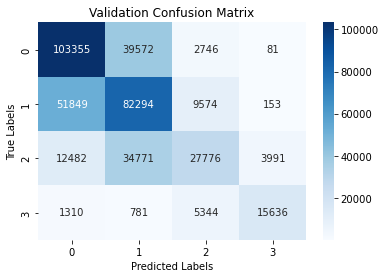

In [ ]:
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

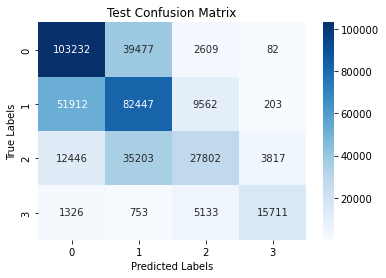

In [ ]:
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
val_accuracy = (val_conf_matrix.diagonal().sum() / val_conf_matrix.sum()) * 100
print(f"Validation Accuracy: {val_accuracy:.2f}%")

test_accuracy = (test_conf_matrix.diagonal().sum() / test_conf_matrix.sum()) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Validation Accuracy: 58.48%
Test Accuracy: 58.51%


#### Decision Tree

In [ ]:
params = {
    'criterion': 'gini',
    'splitter': 'best',
    'max_depth': 15,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
}

dt_model = DecisionTreeClassifier(**params)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [ ]:
y_val_pred = dt_model.predict(X_val)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Validation Confusion Matrix:")
print(val_conf_matrix)
print()
print(classification_report(y_val, y_val_pred))

y_test_pred = dt_model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(test_conf_matrix)
print()
print(classification_report(y_test, y_test_pred))

Validation Confusion Matrix:
[[111052  33674   1020      8]
 [ 51571  77850  14345    104]
 [  5165  24311  45805   3739]
 [    32    414   7204  15421]]

              precision    recall  f1-score   support

           1       0.66      0.76      0.71    145754
           2       0.57      0.54      0.56    143870
           3       0.67      0.58      0.62     79020
           4       0.80      0.67      0.73     23071

    accuracy                           0.64    391715
   macro avg       0.68      0.64      0.65    391715
weighted avg       0.64      0.64      0.64    391715

Test Confusion Matrix:
[[111026  33330   1034     10]
 [ 51760  77855  14381    128]
 [  5230  24509  45908   3621]
 [    26    375   7065  15457]]

              precision    recall  f1-score   support

           1       0.66      0.76      0.71    145400
           2       0.57      0.54      0.56    144124
           3       0.67      0.58      0.62     79268
           4       0.80      0.67      0.73 

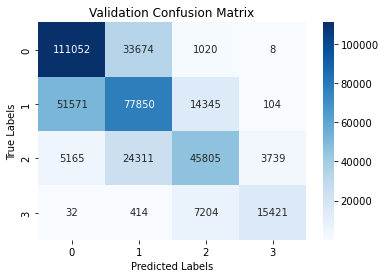

In [ ]:
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

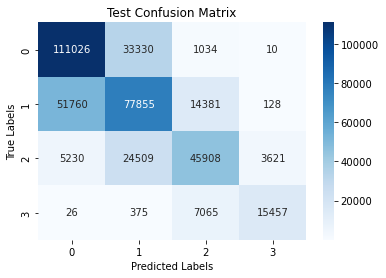

In [ ]:
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
val_accuracy = (val_conf_matrix.diagonal().sum() / val_conf_matrix.sum()) * 100
print(f"Validation Accuracy: {val_accuracy:.2f}%")

test_accuracy = (test_conf_matrix.diagonal().sum() / test_conf_matrix.sum()) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Validation Accuracy: 63.85%
Test Accuracy: 63.88%


#### Random Forest

In [ ]:
params = {
    'n_estimators': 30,
    'criterion': 'gini',
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'auto',
}

rf_model = RandomForestClassifier(**params)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30)

In [ ]:
y_val_pred = rf_model.predict(X_val)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Validation Confusion Matrix:")
print(val_conf_matrix)
print()
print(classification_report(y_val, y_val_pred))

y_test_pred = rf_model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(test_conf_matrix)
print()
print(classification_report(y_test, y_test_pred))

Validation Confusion Matrix:
[[110641  34070   1034      9]
 [ 51234  77969  14574     93]
 [  5186  24091  46074   3669]
 [    25    405   7089  15552]]

              precision    recall  f1-score   support

           1       0.66      0.76      0.71    145754
           2       0.57      0.54      0.56    143870
           3       0.67      0.58      0.62     79020
           4       0.80      0.67      0.73     23071

    accuracy                           0.64    391715
   macro avg       0.68      0.64      0.66    391715
weighted avg       0.64      0.64      0.64    391715

Test Confusion Matrix:
[[110644  33726   1020     10]
 [ 51357  78085  14579    103]
 [  5236  24267  46208   3557]
 [    24    368   6919  15612]]

              precision    recall  f1-score   support

           1       0.66      0.76      0.71    145400
           2       0.57      0.54      0.56    144124
           3       0.67      0.58      0.62     79268
           4       0.81      0.68      0.74 

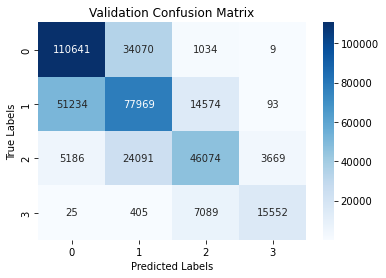

In [ ]:
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

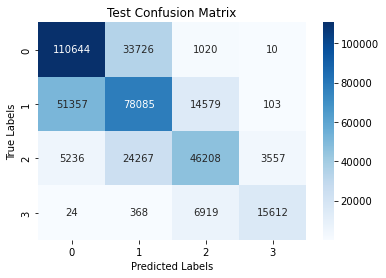

In [ ]:
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
val_accuracy = (val_conf_matrix.diagonal().sum() / val_conf_matrix.sum()) * 100
print(f"Validation Accuracy: {val_accuracy:.2f}%")

test_accuracy = (test_conf_matrix.diagonal().sum() / test_conf_matrix.sum()) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Validation Accuracy: 63.88%
Test Accuracy: 63.96%


#### Gradient Boosting Classifier

In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_val_pred = gb_model.predict(X_val)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Validation Confusion Matrix:")
print(val_conf_matrix)
print()
print(classification_report(y_val, y_val_pred))

y_test_pred = gb_model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(test_conf_matrix)
print()
print(classification_report(y_test, y_test_pred))

Validation Confusion Matrix:
[[109801  34892   1008     53]
 [ 50630  78604  14534    102]
 [  5139  24228  45840   3813]
 [    21    413   6997  15640]]

              precision    recall  f1-score   support

           1       0.66      0.75      0.71    145754
           2       0.57      0.55      0.56    143870
           3       0.67      0.58      0.62     79020
           4       0.80      0.68      0.73     23071

    accuracy                           0.64    391715
   macro avg       0.68      0.64      0.65    391715
weighted avg       0.64      0.64      0.64    391715

Test Confusion Matrix:
[[109762  34589    997     52]
 [ 50900  78629  14479    116]
 [  5138  24472  46016   3642]
 [    14    368   6813  15728]]

              precision    recall  f1-score   support

           1       0.66      0.75      0.71    145400
           2       0.57      0.55      0.56    144124
           3       0.67      0.58      0.62     79268
           4       0.80      0.69      0.74 

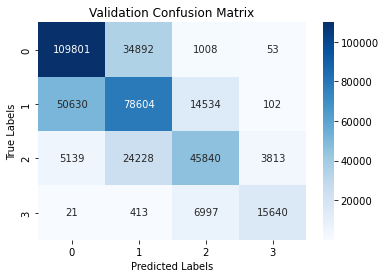

In [ ]:
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

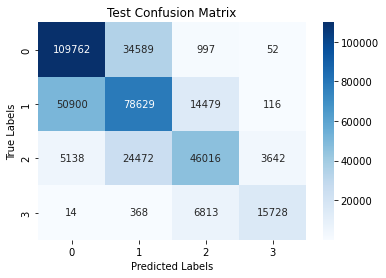

In [ ]:
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
val_accuracy = (val_conf_matrix.diagonal().sum() / val_conf_matrix.sum()) * 100
print(f"Validation Accuracy: {val_accuracy:.2f}%")

test_accuracy = (test_conf_matrix.diagonal().sum() / test_conf_matrix.sum()) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Validation Accuracy: 63.79%
Test Accuracy: 63.86%


#### Naive Bayes

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_val_pred = gnb_model.predict(X_val)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Validation Confusion Matrix:")
print(val_conf_matrix)
print()
print(classification_report(y_val, y_val_pred))

y_test_pred = gnb_model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(test_conf_matrix)
print()
print(classification_report(y_test, y_test_pred))

Validation Confusion Matrix:
[[128542  11627   5107    478]
 [ 78805  44337  19418   1310]
 [  9183  25813  39858   4166]
 [    62    815   8892  13302]]

              precision    recall  f1-score   support

           1       0.59      0.88      0.71    145754
           2       0.54      0.31      0.39    143870
           3       0.54      0.50      0.52     79020
           4       0.69      0.58      0.63     23071

    accuracy                           0.58    391715
   macro avg       0.59      0.57      0.56    391715
weighted avg       0.57      0.58      0.55    391715

Test Confusion Matrix:
[[128215  11664   5051    470]
 [ 79214  44034  19560   1316]
 [  9139  26171  39822   4136]
 [    70    822   8623  13408]]

              precision    recall  f1-score   support

           1       0.59      0.88      0.71    145400
           2       0.53      0.31      0.39    144124
           3       0.55      0.50      0.52     79268
           4       0.69      0.58      0.63 

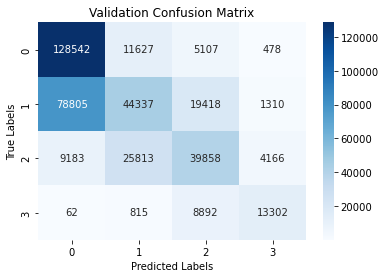

In [ ]:
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

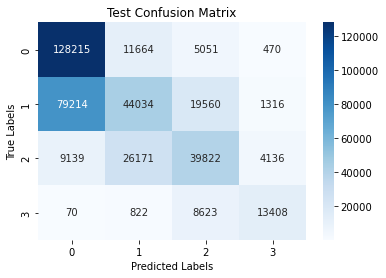

In [ ]:
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
val_accuracy = (val_conf_matrix.diagonal().sum() / val_conf_matrix.sum()) * 100
print(f"Validation Accuracy: {val_accuracy:.2f}%")

test_accuracy = (test_conf_matrix.diagonal().sum() / test_conf_matrix.sum()) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Validation Accuracy: 57.70%
Test Accuracy: 57.56%


#### Deep Learning - Sequential Method

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = model.fit(X_train, y_train_one_hot, epochs=10, batch_size=200, validation_data=(X_val, y_val_one_hot))

test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
9141/9141 [==============================] - 19s 2ms/step - loss: 0.7755 - accuracy: 0.6373 - val_loss: 0.7765 - val_accuracy: 0.6366
Epoch 2/10
9141/9141 [==============================] - 16s 2ms/step - loss: 0.7743 - accuracy: 0.6380 - val_loss: 0.7787 - val_accuracy: 0.6331
Epoch 3/10
9141/9141 [==============================] - 16s 2ms/step - loss: 0.7736 - accuracy: 0.6381 - val_loss: 0.7759 - val_accuracy: 0.6362
Epoch 4/10
9141/9141 [==============================] - 16s 2ms/step - loss: 0.7732 - accuracy: 0.6385 - val_loss: 0.7742 - val_accuracy: 0.6383
Epoch 5/10
9141/9141 [==============================] - 16s 2ms/step - loss: 0.7727 - accuracy: 0.6384 - val_loss: 0.7748 - val_accuracy: 0.6377
Epoch 6/10
9141/9141 [==============================] - 16s 2ms/step - loss: 0.7724 - accuracy: 0.6388 - val_loss: 0.7741 - val_accuracy: 0.6368
Epoch 7/10
9141/9141 [==============================] - 16s 2ms/step - loss: 0.7721 - accuracy: 0.6387 - val_loss: 0.7735 - val_ac

In [ ]:
y_test_pred_one_hot = model.predict(X_test)

y_test_pred = tf.argmax(y_test_pred_one_hot, axis=1)

test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(test_conf_matrix)
print()
print(classification_report(y_test, y_test_pred))

12242/12242 [==============================] - 10s 772us/step
Test Confusion Matrix:
[[108137  35755   1499      9]
 [ 49143  76252  18629    100]
 [  4810  21035  50045   3378]
 [    18    313   7142  15450]]

              precision    recall  f1-score   support

           1       0.67      0.74      0.70    145400
           2       0.57      0.53      0.55    144124
           3       0.65      0.63      0.64     79268
           4       0.82      0.67      0.74     22923

    accuracy                           0.64    391715
   macro avg       0.68      0.64      0.66    391715
weighted avg       0.64      0.64      0.64    391715



In [ ]:
def plot_function(history):
    fig, ax = plt.subplots(1, 2, figsize = (25,8))
    ax[0].plot(history.history['loss'], color='red', label='train_loss')
    ax[0].set_title('Loss and val_loss')
    ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
    ax[0].legend()
    ax[1].plot(history.history['accuracy'], color='orange', label ='train_accuracy')
    ax[1].set_title('accuracy and val_accuracy')
    ax[1].plot(history.history['val_accuracy'], color='black', label='val_accuarcy')
    ax[1].legend()

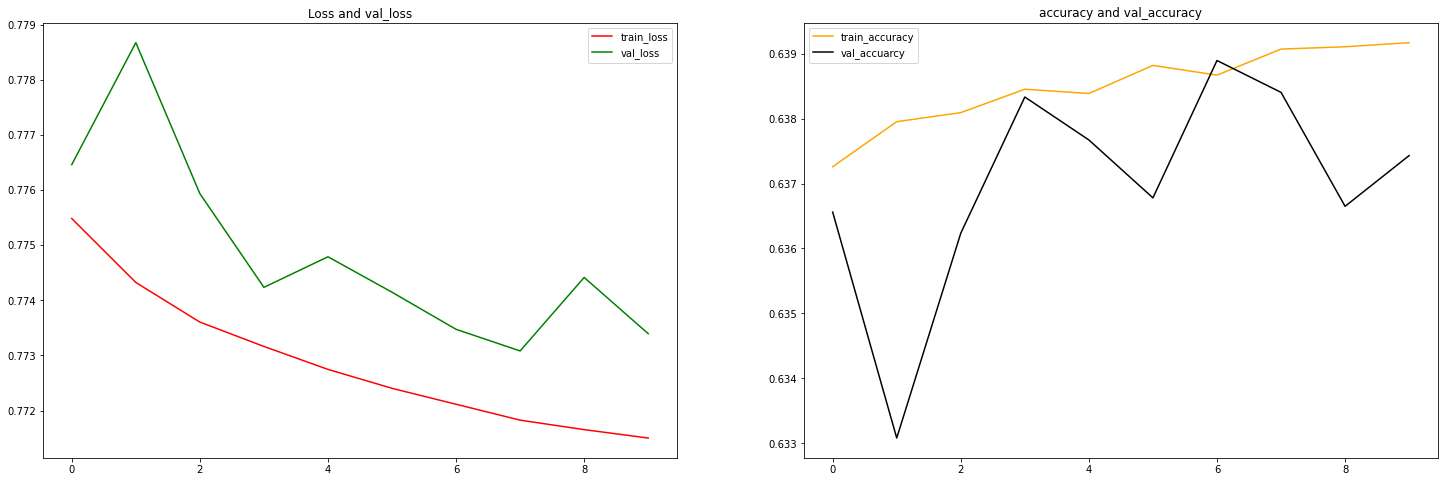

In [ ]:
plot_function(history1)

#### Deep Learning - Functional API Method

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)

inputs = keras.Input(shape=(X_train.shape[1],))

x = layers.Dense(64, activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)

x_shortcut = layers.Dense(128, activation='relu')(inputs)
x_shortcut = layers.BatchNormalization()(x_shortcut)

x = layers.Add()([x, x_shortcut])
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)

x_shortcut = layers.Dense(64, activation='relu')(inputs)
x_shortcut = layers.BatchNormalization()(x_shortcut)
x = layers.Add()([x, x_shortcut])

x = layers.Dense(32, activation='relu')(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(5, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(X_train, y_train_one_hot, epochs=10, batch_size=200, validation_data=(X_val, y_val_one_hot))

test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy}")
y_test_pred_one_hot = model.predict(X_test)
y_test_pred = tf.argmax(y_test_pred_one_hot, axis=1)

test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(test_conf_matrix)
print()
print(classification_report(y_test, y_test_pred))

Epoch 1/10
9141/9141 [==============================] - 32s 3ms/step - loss: 0.7896 - accuracy: 0.6332 - val_loss: 0.7757 - val_accuracy: 0.6374
Epoch 2/10
9141/9141 [==============================] - 30s 3ms/step - loss: 0.7772 - accuracy: 0.6364 - val_loss: 0.7766 - val_accuracy: 0.6362
Epoch 3/10
9141/9141 [==============================] - 32s 3ms/step - loss: 0.7757 - accuracy: 0.6371 - val_loss: 0.7743 - val_accuracy: 0.6375
Epoch 4/10
9141/9141 [==============================] - 30s 3ms/step - loss: 0.7746 - accuracy: 0.6375 - val_loss: 0.7739 - val_accuracy: 0.6380
Epoch 5/10
9141/9141 [==============================] - 30s 3ms/step - loss: 0.7739 - accuracy: 0.6379 - val_loss: 0.7738 - val_accuracy: 0.6382
Epoch 6/10
9141/9141 [==============================] - 31s 3ms/step - loss: 0.7736 - accuracy: 0.6381 - val_loss: 0.7727 - val_accuracy: 0.6385
Epoch 7/10
9141/9141 [==============================] - 31s 3ms/step - loss: 0.7733 - accuracy: 0.6382 - val_loss: 0.7724 - val_ac

In [ ]:
def plot_function(history):
    fig, ax = plt.subplots(1, 2, figsize = (25,8))
    ax[0].plot(history.history['loss'], color='red', label='train_loss')
    ax[0].set_title('Loss and val_loss')
    ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
    ax[0].legend()
    ax[1].plot(history.history['accuracy'], color='orange', label ='train_accuracy')
    ax[1].set_title('accuracy and val_accuracy')
    ax[1].plot(history.history['val_accuracy'], color='black', label='val_accuarcy')
    ax[1].legend()

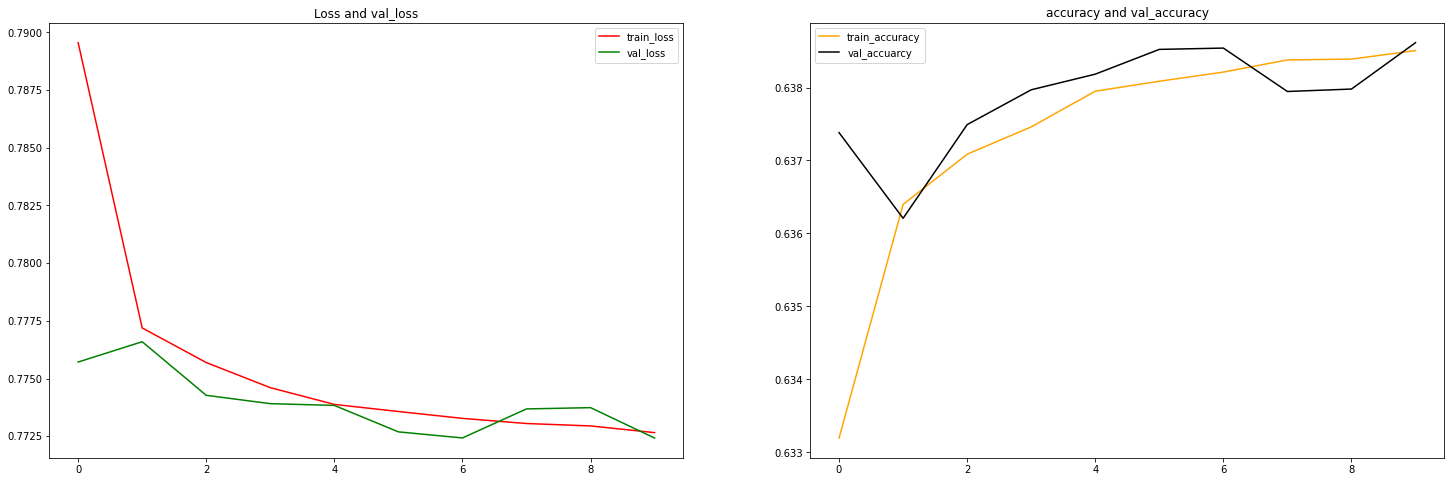

In [ ]:
plot_function(history2)

### Prediction of Medical Surgical Description

In [ ]:
x = df_encoded.drop(columns=['APR Medical Surgical Description'])
y = df_encoded['APR Medical Surgical Description']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
def get_metrics_score(model, trainx, testx, trainy, testy, flag=True):
    score_list = []

    train_pred = model.predict(trainx)
    test_pred = model.predict(testx)

    train_acc = model.score(trainx,trainy)
    test_acc = model.score(testx,testy)

    train_recall = metrics.recall_score(trainy,train_pred)
    test_recall = metrics.recall_score(testy,test_pred)

    train_precision = metrics.precision_score(trainy,train_pred)
    test_precision = metrics.precision_score(testy,test_pred)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(trainx,trainy))
        print("Accuracy on test set : ",model.score(testx,testy))
        print("Recall on training set : ",metrics.recall_score(trainy,train_pred))
        print("Recall on test set : ",metrics.recall_score(testy,test_pred))
        print("Precision on training set : ",metrics.precision_score(trainy,train_pred))
        print("Precision on test set : ",metrics.precision_score(testy,test_pred))

    return score_list

In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(x_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Medical","Actual - Surgical"]],
                  columns = [i for i in ['Predicted - Medical','Predicted - Surgical']])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels, fmt='', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

Accuracy on training set :  0.7787756336799821
Accuracy on test set :  0.7780090256889411
Recall on training set :  0.13465624332869094
Recall on test set :  0.1333636186644169
Precision on training set :  0.644354721019604
Precision on test set :  0.6434190442644123


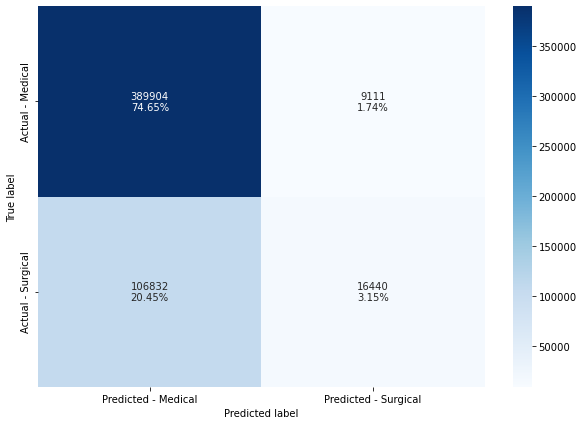

In [ ]:
scores_LR = get_metrics_score(lr,x_train,x_test,y_train,y_test)
make_confusion_matrix(lr,y_test)

#### Bagging and Boosting

Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV

Stratified K-Folds cross-validator provides dataset indices to split data in train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping distribution of both classes in each fold same as the target variable. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [ ]:
models = []  # Empty list to store all the models


models.append(
    (
        "DTREE",
        Pipeline(
            steps=[("scaler", StandardScaler()),
                   ("decision_tree", DecisionTreeClassifier(random_state=1)),]
        ),
    )
)

models.append(
    (
        "Bagging",
        Pipeline(
            steps=[("scaler", StandardScaler()),
                   ("bagging", BaggingClassifier(random_state=1)),]
        ),
    )
)

models.append(
    (
        "XGB",
        Pipeline(
            steps=[("scaler", StandardScaler()),
                   ("xgboost", XGBClassifier(random_state=1)),]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


for name, model in models:
    scoring = 'recall'
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=x_train, y=y_train, scoring=scoring, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

DTREE: 99.73426587644482
Bagging: 99.73060618690847
XGB: 99.92172330713946


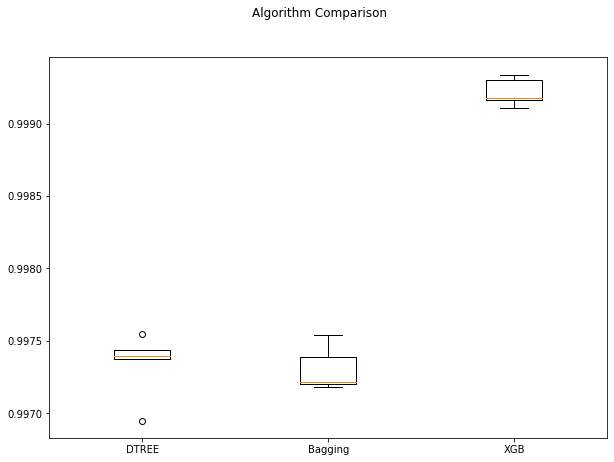

In [ ]:
fig = plt.figure(figsize=(10,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()